In [142]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()

sys.path.append(os.getenv("ROOT"))

In [143]:
import polars as pl
import numpy as np
from datetime import date
import silverfund.data_access_layer as dal
from silverfund.enums import Interval
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
start_date = date(1996, 1, 1)
end_date = date(2023, 12, 31)
interval = Interval.MONTHLY

In [145]:
universe = dal.load_universe(interval=interval, start_date=start_date, end_date=end_date)

training_data = universe.join(
        dal.load_barra_returns(interval=interval, start_date=start_date, end_date=end_date),
        on=["date", "barrid"],
        how="left",
).sort(["barrid", "date"])

training_data

Loading Barra Returns: 100%|██████████| 28/28 [00:04<00:00,  5.75it/s]


date,barrid,currency,mktcap,price,logret,ret
date,str,str,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314
…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933


In [146]:
barra_total_risk = dal.load_total_risk(
    interval=interval, start_date=start_date, end_date=end_date, quiet=False
)

barra_total_risk

Loading Barra Total Risk: 100%|██████████| 28/28 [00:04<00:00,  5.94it/s]


date,barrid,div_yield,histbeta,predbeta,spec_risk,total_risk
date,str,f64,f64,f64,f64,f64
1996-01-31,"""AUSBYA1""",0.043127,-0.037665,0.288802,0.140726,0.1833
1996-01-31,"""CANAMH1""",0.0,0.637434,0.917042,0.360302,0.413814
1996-01-31,"""CANASK1""",0.0,0.574092,1.862454,0.945387,0.980487
1996-01-31,"""CANAUD1""",0.047458,0.00016,0.797736,0.13528,0.193173
1996-01-31,"""CANAUS1""",null,0.00016,0.049291,0.25631,0.358115
…,…,…,…,…,…,…
2023-12-29,"""USBPPH1""",null,1.078032,0.95078,0.181427,0.308507
2023-12-29,"""USBPPS1""",null,0.805638,0.983537,0.289836,0.407579
2023-12-29,"""USBPQA1""",null,1.241031,1.592499,0.728063,0.821866


In [147]:
df = training_data.join(
    barra_total_risk.select(["date", "barrid", "predbeta", "spec_risk"]),  # Select only relevant columns
    on=["date", "barrid"],
    how="left"
)

df

date,barrid,currency,mktcap,price,logret,ret,predbeta
date,str,str,f64,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349
…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263


In [148]:
df = df.with_columns(pl.col('ret'))

df = df.drop_nulls(subset=["predbeta"])

df

date,barrid,currency,mktcap,price,logret,ret,predbeta
date,str,str,f64,f64,f64,f64,f64
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349
…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263


In [149]:
# Create portfolio bins

labels = [str(x) for x in range(10)]

df = df.with_columns(pl.col("predbeta").qcut(10, labels=labels).over("date").alias("bin"))

df

date,barrid,currency,mktcap,price,logret,ret,predbeta,bin
date,str,str,f64,f64,f64,f64,f64,cat
2009-05-29,"""CAN17B1""","""CAD""",1.1091e9,16.16,-0.002316,-0.002313,1.280289,"""5"""
2006-06-30,"""CAN1G71""","""CAD""",5.5439e9,28.68,-0.014538,-0.014433,0.690204,"""0"""
2006-07-31,"""CAN1G71""","""CAD""",5.4473e9,28.18,-0.02211,-0.021867,0.689352,"""0"""
2023-04-28,"""GERRJO1""","""EUR""",7.59564864e8,18.0,-0.00554,-0.005524,0.593054,"""0"""
2013-07-31,"""USA06Z1""","""USD""",6.006157e8,6.26,-0.120264,-0.113314,0.34349,"""0"""
…,…,…,…,…,…,…,…,…
2023-11-30,"""USBPJV1""","""USD""",2.3905e8,16.35,-0.150738,-0.139927,1.5326,"""7"""
2023-12-29,"""USBPJV1""","""USD""",2.6725e8,18.48,0.140255,0.150567,1.647418,"""8"""
2023-11-30,"""USBPKS1""","""USD""",6.0244e7,3.61,-3.726922,-0.975933,1.338263,"""6"""


In [151]:
# Create portfolio returns dataframe

# Aggregate (equal weight portfolios)
port = df.group_by(["date", "bin"]).agg(pl.col("ret").mean())

# Pivot
port = port.pivot(on="bin", index="date", values="ret")

# Reorder columns
port = port.select(["date"] + labels)

# Sort
port = port.sort(by="date")

port

date,0,1,2,3,4,5,6,7,8,9
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1996-01-31,0.007605,0.015284,0.009473,0.008752,0.011847,0.012592,0.015176,0.013848,0.019808,-0.028428
1996-02-29,0.007362,0.014095,0.018355,0.03412,0.020475,0.031176,0.033025,0.039213,0.043246,0.051707
1996-03-29,0.008022,0.02132,0.031255,0.025533,0.031153,0.031689,0.047439,0.011954,0.018899,-0.005395
1996-04-30,0.00156,0.023299,0.024383,0.031308,0.048644,0.029178,0.054237,0.065734,0.075907,0.136326
1996-05-31,0.019196,0.020529,0.025725,0.031748,0.017534,0.025775,0.033253,0.044181,0.065718,0.044483
…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054


In [152]:
# Create spread portfolio

port = port.with_columns((pl.col("0") - pl.col("9")).alias("spread"))

port

date,0,1,2,3,4,5,6,7,8,9,spread
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1996-01-31,0.007605,0.015284,0.009473,0.008752,0.011847,0.012592,0.015176,0.013848,0.019808,-0.028428,0.036033
1996-02-29,0.007362,0.014095,0.018355,0.03412,0.020475,0.031176,0.033025,0.039213,0.043246,0.051707,-0.044345
1996-03-29,0.008022,0.02132,0.031255,0.025533,0.031153,0.031689,0.047439,0.011954,0.018899,-0.005395,0.013417
1996-04-30,0.00156,0.023299,0.024383,0.031308,0.048644,0.029178,0.054237,0.065734,0.075907,0.136326,-0.134765
1996-05-31,0.019196,0.020529,0.025725,0.031748,0.017534,0.025775,0.033253,0.044181,0.065718,0.044483,-0.025287
…,…,…,…,…,…,…,…,…,…,…,…
2023-08-31,-0.01506,-0.010442,-0.014899,-0.023698,-0.040717,-0.052584,-0.062269,-0.069638,-0.094992,-0.170791,0.155731
2023-09-29,-0.022473,-0.032243,-0.0457,-0.040103,-0.051293,-0.066439,-0.067799,-0.085306,-0.098848,-0.128615,0.106142
2023-10-31,0.003075,-0.013311,-0.040631,-0.047284,-0.045289,-0.065174,-0.091382,-0.084217,-0.114092,-0.170054,0.17313


In [153]:
# Unpivot dataframe
port = port.unpivot(index="date", variable_name="bin", value_name="ret")

# Sort
port = port.sort(by=["date", "bin"])

port

date,bin,ret
date,str,f64
1996-01-31,"""0""",0.007605
1996-01-31,"""1""",0.015284
1996-01-31,"""2""",0.009473
1996-01-31,"""3""",0.008752
1996-01-31,"""4""",0.011847
…,…,…
2023-12-29,"""6""",0.149087
2023-12-29,"""7""",0.183335
2023-12-29,"""8""",0.20513


In [154]:
# Calculate mean, std, sharpe, and tstat of each portfolio

# Mean, std, and count
result = port.group_by("bin").agg(
    [
        pl.col("ret").mean().cast(pl.Float64).alias("mean"),
        pl.col("ret").std().cast(pl.Float64).alias("std"),
        pl.col("ret").count().cast(pl.Float64).alias("count"),
    ]
)

# Sharpe
result = result.with_columns(
    ((pl.col("mean") * 12) / (pl.col("std") * np.sqrt(12)))
    .cast(pl.Float64)
    .alias("annualized_sharpe")
)

# Tstat
result = result.with_columns(
    (pl.col("mean") / (pl.col("std") / pl.col("count").sqrt())).cast(pl.Float64).alias("tstat")
)

# Sort
result = result.sort(by="bin")

# Transpose
result = result.transpose(include_header=True, column_names="bin", header_name="statistic")

print("Monthly results")
result

Monthly results


statistic,0,1,2,3,4,5,6,7,8,9,spread
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""mean""",0.012049,0.012381,0.012269,0.012329,0.012516,0.011287,0.00944,0.007448,0.004621,0.001577,0.010472
"""std""",0.028694,0.036226,0.041802,0.047332,0.053022,0.05917,0.06848,0.081779,0.103554,0.140288,0.130475
"""count""",336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0
"""annualized_sharpe""",1.454671,1.183975,1.016731,0.902359,0.817706,0.660784,0.47752,0.315501,0.154593,0.038947,0.278032
"""tstat""",7.697398,6.265005,5.380035,4.774837,4.326891,3.496539,2.526801,1.669476,0.818031,0.206089,1.471207


In [155]:
# Create backtest plot

# Log returns
port = port.with_columns(pl.col("ret").log1p().over("bin").alias("logret"))

# Cummulative sum log returns
port = port.with_columns(pl.col("logret").cum_sum().over("bin").alias("cumret") * 100)

port

date,bin,ret,logret,cumret
date,str,f64,f64,f64
1996-01-31,"""0""",0.007605,0.007576,0.757582
1996-01-31,"""1""",0.015284,0.015168,1.516818
1996-01-31,"""2""",0.009473,0.009428,0.942797
1996-01-31,"""3""",0.008752,0.008714,0.871374
1996-01-31,"""4""",0.011847,0.011778,1.177766
…,…,…,…,…
2023-12-29,"""6""",0.149087,0.138968,236.714962
2023-12-29,"""7""",0.183335,0.168337,136.527241
2023-12-29,"""8""",0.20513,0.186587,-26.199725


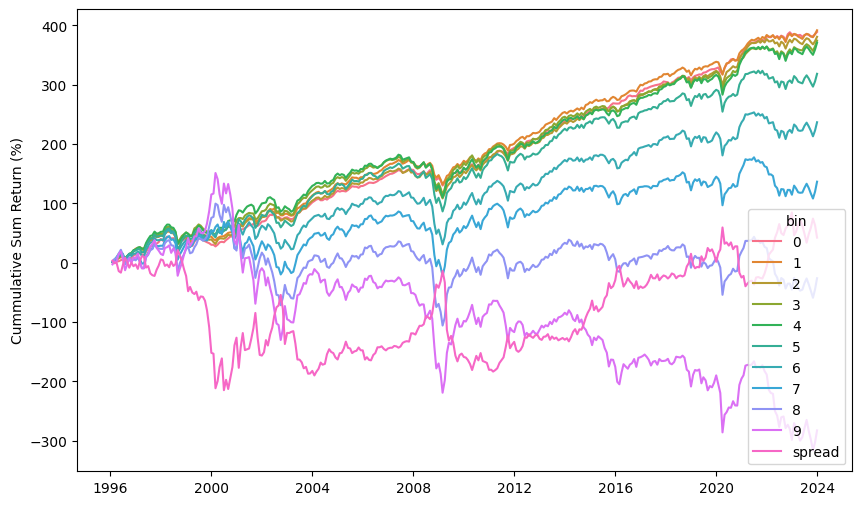

In [156]:
plt.figure(figsize=(10, 6))
sns.lineplot(port, x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

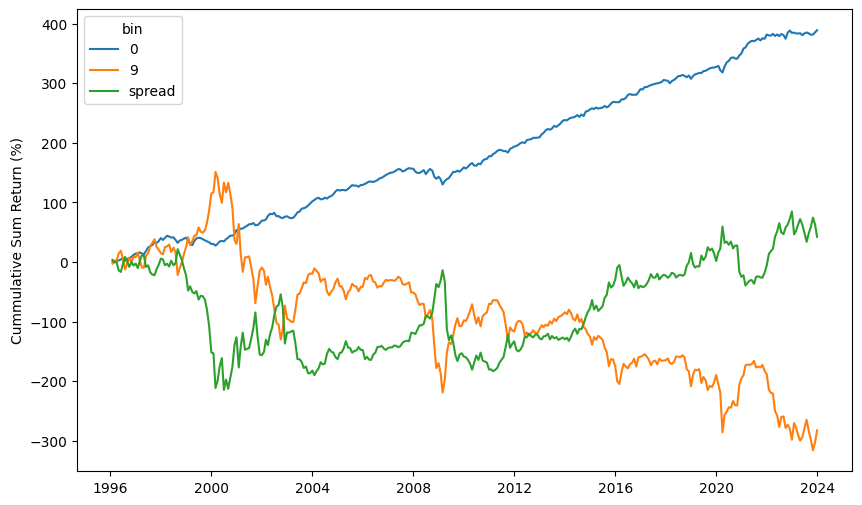

In [157]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    port.filter(pl.col("bin").is_in(["0", "9", "spread"])), x="date", y="cumret", hue="bin"
)
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

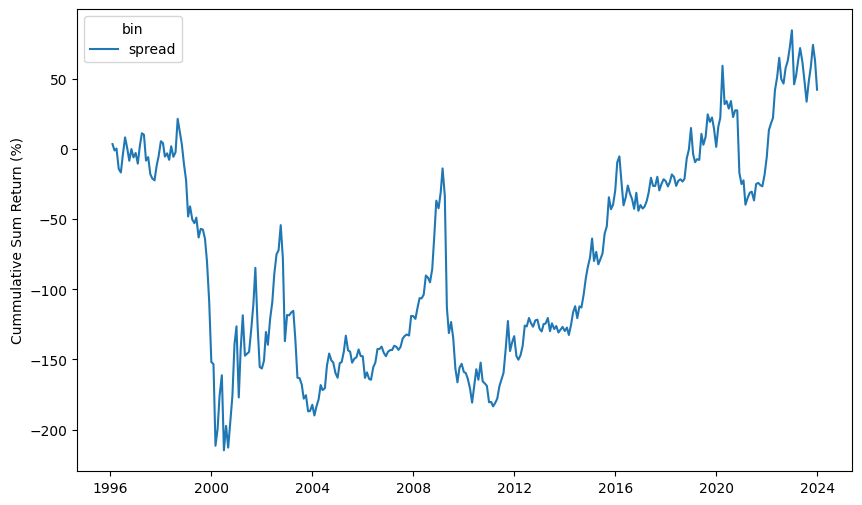

In [158]:
plt.figure(figsize=(10, 6))
sns.lineplot(port.filter(pl.col("bin") == "spread"), x="date", y="cumret", hue="bin")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Return (%)")
plt.show()

In [159]:
spread = port.filter(pl.col("bin") == "spread").sort("date")["ret"]

portfolio_er = spread.mean()
portfolio_vol = np.sqrt(spread.std())

portfolio_sharpe = (portfolio_er / portfolio_vol) * np.sqrt(252)

print(f"Portfolio sharpe: {portfolio_sharpe:.4f}")

Portfolio sharpe: 0.4602
